pip install seaborn
pip install xlrd

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#pip install xlrd
pip install seaborn

In [2]:
smile_on = pd.read_csv('../data/SmileOn11.28.2020.csv', sep = ',', encoding='gbk', skiprows = 2, low_memory=False)
#bill = pd.read_csv('../data/Medicare_Provider_Utilization_and_Payment_Data__Physician_and_Other_Supplier_PUF_CY2017.csv', low_memory=False)
#prov_out = pd.read_csv('../data/Provider_Outpatient_Hospital_Charge_Data_by_APC__CY2017.csv')
#data_dict = pd.read_excel('../data/Data_Dictionary.xlsx')
city_info = pd.read_csv('../data/500_Cities__Local_Data_for_Better_Health__2019_release.csv')
#apc = pd.read_excel('../data/2020_October_Web_Addendum_A.10212020.xlsx', skiprows = 1)
#hcpcs = pd.read_excel('../data/2020_October_Web_Addendum_B.10212020.xlsx', skiprows = 2)

apc.head()

hcpcs.head()

data_dict

In [3]:
smile_on.head()

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,NaN,11/25/2020 16:46,11/25/2020 16:48,2,3859874,136529,NaN,NaN,...,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,NaN,11/25/2020 15:40,11/25/2020 15:55,15,3859755,82341,NaN,NaN,...,NaN,NaN,NaN,Health Assist Office,NaN,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,NaN,11/25/2020 15:02,11/25/2020 15:02,0,2518680,119506,NaN,NaN,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,NaN,Yes,Yes,Yes,NaN,NaN
3,81375215,SMILE ON 60+ Clinical,NaN,11/25/2020 14:17,11/25/2020 14:17,0,3231923,143703,NaN,NaN,...,NaN,NaN,Christ Community Health Services- Frayser,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,NaN,11/25/2020 13:50,11/25/2020 13:58,8,-1,135611,NaN,NaN,...,Urgent Care - within next week-pain or infection,Yes,Neighborhood Health - Lebanon,NaN,NaN,NaN,Yes,No,NaN,Yes


smile_on.columns

In [4]:
so_1 = smile_on[['CallReportNum',
'ReportVersion',
'CallerNum',
'CityName',
'CountyName',
'PostalCode',
'EnteredOn',
'Birth Year',
'SMILE ON 60+ Screening - Last Screening Date',
'SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)',
'SMILE ON 60+ Site Information - Enroller ID',
'SMILE ON 60+ Site Information - Enroller Location',
'SMILE ON 60+ Treatment Plan - Is the treatment plan completed?', 
'SMILE ON 60+ Treatment Plan - Was a treatment plan developed?',
'SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)', 
'SMILE ON 60+ Verification of Eligibility - Transportation Arranged',
'SMILE ON 60+ Verification of Eligibility - Verification of Eligibility']]

In [5]:
so_1.columns=['CallReportNum', 
'ReportVersion',
'CallerNum',
'CityName',
'CountyName',
'PostalCode', 
'EnteredOn',
'Birth Year',
'Screening - Last Screening Date',
'Oral Care Encounter - What care was provided to the enrollee?',
'Site Information - Enroller ID',
'Site Information - Enroller Location',
'Treatment Plan - Is the treatment plan completed?',
'Treatment Plan - Was a treatment plan developed?',
'Treatment Plan - Was the enrollee able to be restored to function',
'Verification of Eligibility Transportation Arranged',
'Verification of Eligibility']

In [6]:
so_1.head(2)

,CallReportNum,ReportVersion,CallerNum,CityName,CountyName,PostalCode,EnteredOn,Birth Year,Screening - Last Screening Date,Oral Care Encounter - What care was provided to the enrollee?,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,Treatment Plan - Was the enrollee able to be restored to function,Verification of Eligibility Transportation Arranged,Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,3859874,Springfield,Robertson,37172.0,11/25/2020 16:48,1957,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,3859755,Nashville,Davidson,37212.0,11/25/2020 15:55,1943,NaN,NaN,NaN,Health Assist Office,NaN,NaN,NaN,NaN,NaN


In [7]:
so_1 = so_1[(so_1['CallerNum'] != -1) & (so_1['CallerNum'] != -2)]

In [8]:
so_1 = so_1[so_1['ReportVersion'] == 'SMILE ON 60+ Clinical']

In [9]:
#Get rid of the long zip code values 
#so_1.astype(numpy.int64)
so_1['PostalCode'] = so_1['PostalCode'].fillna("")
#so_1 = so_1.replace(np.nan, '', regex=True)
#so_1['PostalCode'] = np.int64(so_1['PostalCode'])

In [10]:
so_1.head()

,CallReportNum,ReportVersion,CallerNum,CityName,CountyName,PostalCode,EnteredOn,Birth Year,Screening - Last Screening Date,Oral Care Encounter - What care was provided to the enrollee?,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,Treatment Plan - Was the enrollee able to be restored to function,Verification of Eligibility Transportation Arranged,Verification of Eligibility
2,81377435,SMILE ON 60+ Clinical,2518680,Rogersville,Hawkins,37857,11/25/2020 15:02,1957,NaN,5650 - Add tooth to existing partial denture - 30,Friends in Need Health Center - Kingsport,Provider Site,Yes,Yes,Yes,NaN,NaN
3,81375215,SMILE ON 60+ Clinical,3231923,Memphis,Shelby,38104,11/25/2020 14:17,1953,NaN,No Code - Denture step Mandibular: may be used...,Christ Community Health Services- Frayser,Provider Site,NaN,NaN,NaN,NaN,NaN
5,81371535,SMILE ON 60+ Clinical,3605119,Kingsport,Sullivan,37664,11/25/2020 13:04,1960,NaN,No Code - Denture step Mandibular: may be used...,Friends in Need Health Center - Kingsport,Provider Site,No,Yes,NaN,NaN,NaN
6,81371527,SMILE ON 60+ Clinical,3859184,Lebanon,Wilson,37087,11/25/2020 13:04,1953,NaN,NaN,Neighborhood Health - Lebanon,Provider Site,NaN,NaN,NaN,No,Yes
7,81371481,SMILE ON 60+ Clinical,3746643,Church Hill,Hawkins,37642,11/25/2020 13:03,1956,NaN,No Code - Denture step Mandibular: may be used...,Friends in Need Health Center - Kingsport,Provider Site,No,Yes,NaN,NaN,NaN


In [11]:
treatment_plan = so_1.loc[so_1['Treatment Plan - Is the treatment plan completed?'].isin(['Yes'])]

In [12]:
treatment_plan = treatment_plan.sort_values(by = 'EnteredOn')

In [13]:
treatment_plan_patients = treatment_plan.drop_duplicates(['CallerNum'], keep='last')

In [14]:
treatment_plan_patients.head()

,CallReportNum,ReportVersion,CallerNum,CityName,CountyName,PostalCode,EnteredOn,Birth Year,Screening - Last Screening Date,Oral Care Encounter - What care was provided to the enrollee?,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,Treatment Plan - Was the enrollee able to be restored to function,Verification of Eligibility Transportation Arranged,Verification of Eligibility
35116,59364969,SMILE ON 60+ Clinical,2511788,Lewisburg,Marshall,37091,1/10/2019 12:45,1937,1/8/2019,NaN,Interfaith Dental Clinic - Murfreesboro,Provider Site,Yes,Yes,Yes,No,Yes
35186,59355822,SMILE ON 60+ Clinical,2440677,Cleveland,Bradley,37323,1/10/2019 7:39,1951,NaN,No Code - Denture step Mandibular: may be used...,Karis Dental Clinic - Cleveland,Provider Site,Yes,NaN,Yes,NaN,NaN
15232,69808733,SMILE ON 60+ Clinical,2795490,Memphis,Shelby,38109,1/10/2020 13:49,1939,7/8/2019,120 - Periodic Oral Evaluation - 15; 1110 - Pr...,Christ Community Health Services- Third Street,Provider Site,Yes,Yes,Yes,No,Yes
15227,69808893,SMILE ON 60+ Clinical,2956206,Memphis,Shelby,38106,1/10/2020 13:53,1956,10/16/2019,2391 - Posterior one surface resin - 15,Christ Community Health Services- Third Street,Provider Site,Yes,Yes,Yes,No,Yes
15108,69809420,SMILE ON 60+ Clinical,2793058,Memphis,Shelby,38109,1/10/2020 14:07,1922,NaN,120 - Periodic Oral Evaluation - 15; 210 - Int...,Christ Community Health Services- Third Street,Provider Site,Yes,Yes,Yes,No,Yes


In [15]:
treatment_plan_patients.shape

(2987, 17)

In [16]:
treatment_plan_patients['Site Information - Enroller ID'].value_counts()

Church Health Center - Memphis                                                          385
Interfaith Dental Clinic - Nashville                                                    370
Interfaith Dental Clinic - Murfreesboro                                                 251
Healing Hands Health Center - Bristol                                                   224
Interfaith Health Clinic of Knoxville - Knoxville                                       216
Keystone Dental Care Inc. - Johnson City                                                194
Friends in Need Health Center - Kingsport                                               193
Matthew Walker Comprehensive Health Center Inc. - Nashville                             189
Karis Dental Clinic - Cleveland                                                         180
Christ Community Health Services- Hickory Hill                                          101
Appalachian Miles for Smiles - Mobile                                           

In [17]:
treatment_plan_patients['Site Information - Enroller ID'].isnull().sum()

1

In [18]:
treatment_plan_patients['Treatment Plan - Was the enrollee able to be restored to function'].value_counts()

Yes    2653
No       86
Name: Treatment Plan - Was the enrollee able to be restored to function, dtype: int64

In [19]:
treatment_plan_patients['Verification of Eligibility'].value_counts()

Yes    858
No       7
Name: Verification of Eligibility, dtype: int64

In [20]:
treatment_plan_patients['Treatment Plan - Is the treatment plan completed?'].value_counts()

Yes    2987
Name: Treatment Plan - Is the treatment plan completed?, dtype: int64

In [21]:
treatment_plan_patients['Treatment Plan - Was a treatment plan developed?'].value_counts()

Yes    2591
No      185
Name: Treatment Plan - Was a treatment plan developed?, dtype: int64

In [22]:
treatment_plan_patients['Verification of Eligibility'].isnull().sum()

2122

In [23]:
treatment_plan_patients.CallerNum.nunique()

2987

In [24]:
treatment_plan_patients.CallerNum.value_counts()

3501070    1
2996590    1
2661707    1
2647368    1
2538823    1
          ..
2724491    1
2501258    1
3483531    1
2509302    1
2830336    1
Name: CallerNum, Length: 2987, dtype: int64

In [25]:
treatment_plan_patients_restored = treatment_plan_patients[treatment_plan_patients['Treatment Plan - Was the enrollee able to be restored to function'] == 'Yes']

In [26]:
treatment_plan_patients_restored.shape

(2653, 17)

In [27]:
treatment_plan_patients_restored['Treatment Plan - Was the enrollee able to be restored to function'].value_counts()

Yes    2653
Name: Treatment Plan - Was the enrollee able to be restored to function, dtype: int64

In [28]:
patients_restored = so_1[so_1['Treatment Plan - Was the enrollee able to be restored to function'].isin(['Yes', 'No'])]

In [29]:
patients_restored = patients_restored.sort_values(by = 'EnteredOn')

In [30]:
patients_restored = patients_restored.drop_duplicates(['CallerNum'], keep='last')

In [72]:
patients_restored.head()

,CallReportNum,ReportVersion,CallerNum,CityName,CountyName,PostalCode,EnteredOn,Birth Year,Screening - Last Screening Date,Oral Care Encounter - What care was provided to the enrollee?,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,Treatment Plan - Was the enrollee able to be restored to function,Verification of Eligibility Transportation Arranged,Verification of Eligibility
35116,59364969,SMILE ON 60+ Clinical,2511788,Lewisburg,Marshall,37091,1/10/2019 12:45,1937,1/8/2019,NaN,Interfaith Dental Clinic - Murfreesboro,Provider Site,Yes,Yes,Yes,No,Yes
35186,59355822,SMILE ON 60+ Clinical,2440677,Cleveland,Bradley,37323,1/10/2019 7:39,1951,NaN,No Code - Denture step Mandibular: may be used...,Karis Dental Clinic - Cleveland,Provider Site,Yes,NaN,Yes,NaN,NaN
15654,69803265,SMILE ON 60+ Clinical,2958504,Antioch,Davidson,37013,1/10/2020 11:25,1954,NaN,150 - Comprehensive Oral Evaluation -new or es...,Interfaith Dental Clinic - Nashville,NaN,No,Yes,No,NaN,NaN
15001,69812694,SMILE ON 60+ Clinical,3118094,Memphis,Shelby,38109,1/10/2020 15:45,1953,1/10/2020,120 - Periodic Oral Evaluation - 15; 274 - Bit...,Christ Community Health Services- Broad Avenue,Provider Site,No,Yes,Yes,No,Yes
16448,69814276,SMILE ON 60+ Clinical,3069453,Nashville,Davidson,37206,1/10/2020 16:35,1946,NaN,2391 - Posterior one surface resin - 15; 2392...,Neighborhood Health - Eastside/Nashville,Provider Site,No,Yes,No,NaN,NaN


In [31]:
patients_restored_yes = patients_restored[patients_restored['Treatment Plan - Was the enrollee able to be restored to function'] == 'Yes']

In [32]:
patients_restored_no = patients_restored[patients_restored['Treatment Plan - Was the enrollee able to be restored to function'] == 'No']

In [33]:
yes = patients_restored_yes['Site Information - Enroller ID'].value_counts().to_frame().reset_index()

In [34]:
no = patients_restored_no['Site Information - Enroller ID'].value_counts().to_frame().reset_index()

In [35]:
combo = pd.merge(yes, no, on = 'index')

In [36]:
combo['total'] = combo['Site Information - Enroller ID_x'] + combo['Site Information - Enroller ID_y']

In [37]:
combo['percentage'] = (combo['Site Information - Enroller ID_x']/combo['total'])*100

In [38]:
combo = combo.sort_values(by = 'total', ascending = False)

In [39]:
combo 

,index,Site Information - Enroller ID_x,Site Information - Enroller ID_y,total,percentage
1,Interfaith Dental Clinic - Nashville,346,276,622,55.627010
0,Church Health Center - Memphis,348,169,517,67.311412
5,Matthew Walker Comprehensive Health Center Inc...,159,300,459,34.640523
2,Interfaith Dental Clinic - Murfreesboro,233,195,428,54.439252
7,Interfaith Health Clinic of Knoxville - Knoxville,132,158,290,45.517241
8,Karis Dental Clinic - Cleveland,131,119,250,52.400000
3,Healing Hands Health Center - Bristol,188,54,242,77.685950
6,Keystone Dental Care Inc. - Johnson City,156,65,221,70.588235
4,Friends in Need Health Center - Kingsport,171,36,207,82.608696
13,Christ Community Health Services- Hickory Hill,51,118,169,30.177515


In [64]:
combo.columns=['Location', 'Restored-yes', 'Restored-no', 'Total', 'Percentage']

In [65]:
combo = combo.head()

In [66]:
combo

,Location,Restored-yes,Restored-no,Total,Percentage
1,Interfaith Dental Clinic - Nashville,346,276,622,55.627010
0,Church Health Center - Memphis,348,169,517,67.311412
5,Matthew Walker Comprehensive Health Center Inc...,159,300,459,34.640523
2,Interfaith Dental Clinic - Murfreesboro,233,195,428,54.439252
7,Interfaith Health Clinic of Knoxville - Knoxville,132,158,290,45.517241


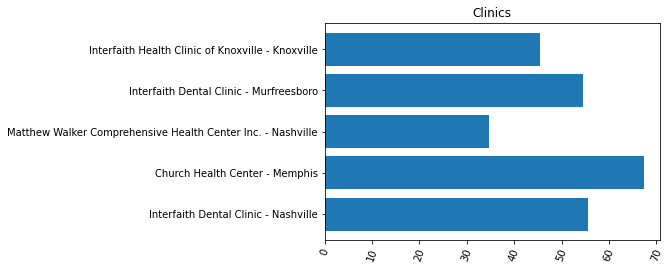

In [67]:
#data = combo.sort_values('')
plt.barh('Location', 'Percentage', data = combo)
plt.xticks(rotation = 70)
plt.title('Clinics');

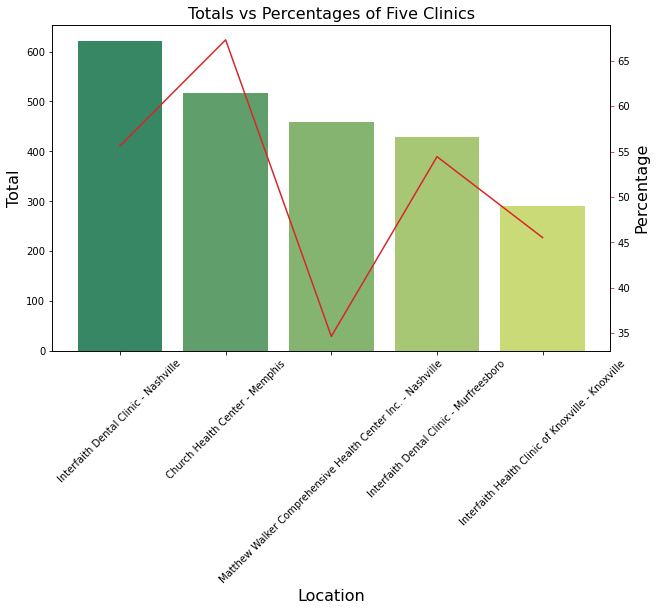

In [68]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Totals vs Percentages of Five Clinics', fontsize=16)
ax1.set_xlabel('Location', fontsize=16)
ax1.set_ylabel('Total', fontsize=16)
ax1 = sns.barplot(x='Location', y='Total', data = combo, palette='summer')
ax1.tick_params(axis='y')
plt.xticks(rotation= 45)
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Clinic Success %', fontsize=16)
ax2 = sns.lineplot(x='Location', y='Percentage', data = combo, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(combo.index.unique()))

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, combo.loc[df['index'] == '', 'count'],
            width=bar_width)
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, combo.loc[df['index'] == 'women', 'count'],
            width=bar_width)

Site Info,Successful Function Restoration,Unsuccessful Function Restoration,Total Number of Times Care Provided,Percent of Successful Restoration of Function,Full Address
Appalachian Miles for Smiles - Mobile,29,3,206,90.625,"1105 W Stone Dr, Kingsport, TN 37660"
Christ Community Health Services- Broad Avenue,132,258,777,33.84615384615385,"2861 Broad Ave, Memphis, TN 38112"
Christ Community Health Services- Frayser,67,76,910,46.85314685314685,"969 Frayser Blvd, Memphis, TN 38127"
Christ Community Health Services- Hickory Hill,147,523,986,21.940298507462686,"5366 Mendenhall Mall, Memphis, TN 38115"
Christ Community Health Services- Raleigh,115,94,611,55.02392344497608,"3481 Austin Peay Hwy, Memphis, TN 38128"
Christ Community Health Services- Third Street,175,93,568,65.29850746268657,"3362 S 3rd St, Memphis, TN 38109"
Church Health Center - Memphis,719,603,3581,54.387291981845685,"1350 Concourse Ave Suite 142, Memphis, TN 38104"
Friends in Need Health Center - Kingsport,527,312,1566,62.81287246722288,"1105 W Stone Dr # 5, Kingsport, TN 37660"
Healing Hands Health Center - Bristol,337,269,1345,55.61056105610561,"245 Midway Medical Park, Bristol, TN 37620"
Interfaith Dental Clinic - Murfreesboro,645,766,3646,45.71226080793763,"210 Robert Rose Dr, Murfreesboro, TN 37129"
Interfaith Dental Clinic - Nashville,1039,1188,5794,46.65469241131567,"600 Hill Ave, Nashville, TN 37210"
Interfaith Health Clinic of Knoxville - Knoxville,396,674,1822,37.00934579439252,"315 Gill Ave, Knoxville, TN 37917"
Karis Dental Clinic - Cleveland,331,748,1809,30.676552363299354,"254 Broad St SW, Cleveland, TN 37311"
Keystone Dental Care Inc. - Johnson City,339,179,1031,65.44401544401545,"603 Bert St # 12, Johnson City, TN 37601"
Matthew Walker - Clarksville,69,346,658,16.626506024096386,"230 Dover Rd, Clarksville, TN 37042"
Matthew Walker Comprehensive Health Center Inc. - Nashville,493,1338,2516,26.92517749863463,"1035 14th Ave N, Nashville, TN 37208"
Meharry Mobile Dental Clinic,3,14,124,17.647058823529413,"1818 Albion St, Nashville, TN 37208"
Mountain Hope Good Shepherd Clinic,12,4,97,75.0,"312 Prince St, Sevierville, TN 37862"
Neighborhood Health - Cleveland Park/ Nashville,90,98,900,47.87234042553192,"905 Main St, Nashville, TN 37206"
Neighborhood Health - Eastside/Nashville,70,60,437,53.84615384615385,"905 Main St, Nashville, TN 37206"
Neighborhood Health - Lebanon,43,56,595,43.43434343434344,"217 E High St #200, Lebanon, TN 37087"
Neighborhood Health - Mission/Nashville,15,5,129,75.0,"639 Lafayette St, Nashville, TN 37203"
Neighborhood Health - Napier/Nashville,43,36,462,54.43037974683544,"107 Charles E Davis Blvd, Nashville, TN 37210"
Northeast Tennessee Community Health Centers Inc. - Johnson City,120,116,582,50.847457627118644,"2151 Century Ln, Johnson City, TN 37604"
Reelfoot Ministries - Obion,36,6,235,85.71428571428571,"6923 Minnick Elbridge Rd, Obion, TN 38240"
Smiles Inc. - South Pittsburg - serving Marion Grundy Franklin and Hamilton Counties,56,83,276,40.28776978417266,"107 E 10th St, South Pittsburg, TN 37380"
TDH - Lawrence Co,27,82,203,24.770642201834864,"1065 East Broad Street
Monticello, MS 39654"
TDH - Maury Co,12,10,304,54.54545454545454,"1909 Hampshire Pike, Columbia, TN 38401"

bill = bill[(bill['State Code of the Provider'] == 'TN')]

groupby clinics/enroller id 
% of successful = successful/ successful + unsuccessful * 100 

bill.head(50)

bill = bill[(bill['State Code of the Provider'] == 'TN')]

bill.columns

bill['State Code of the Provider'].value_counts()

prov_out.head()

## city_info data cleanup 

In [42]:
city_info.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,GA,Georgia,Savannah,Census Tract,BRFSS,Prevention,1369000-13051004002,Visits to doctor for routine checkup within th...,%,...,75.5,NaN,NaN,"3,697","(32.0005963715, -81.1016216322)",PREVENT,CHECKUP,1369000.0,1.305100e+10,Annual Checkup
1,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Health Outcomes,15003003101,Coronary heart disease among adults aged >=18 ...,%,...,5.6,NaN,NaN,"3,687","(21.3258064243, -157.793873751)",HLTHOUT,CHD,15003.0,1.500300e+10,Coronary Heart Disease
2,2016,GA,Georgia,Sandy Springs,City,BRFSS,Prevention,1368516,Papanicolaou smear use among adult women aged ...,%,...,85.1,NaN,NaN,"93,853","(33.9366669867, -84.3703197084)",PREVENT,PAPTEST,1368516.0,NaN,Pap Smear Test
3,2017,GA,Georgia,Roswell,Census Tract,BRFSS,Health Outcomes,1367284-13121011410,Mental health not good for >=14 days among adu...,%,...,9.8,NaN,NaN,"6,363","(33.9880169272, -84.2891245228)",HLTHOUT,MHLTH,1367284.0,1.312101e+10,Mental Health
4,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Prevention,15003004800,Current lack of health insurance among adults ...,%,...,12.5,NaN,NaN,"6,707","(21.3415691226, -157.853573613)",PREVENT,ACCESS2,15003.0,1.500300e+10,Health Insurance


In [43]:
city_info = city_info[(city_info['StateAbbr'] == 'TN')]

In [44]:
city_info.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
2357,2017,TN,Tennessee,Memphis,Census Tract,BRFSS,Health Outcomes,4748000-47157007300,Chronic kidney disease among adults aged >=18 ...,%,...,3.2,NaN,NaN,"4,127","(35.1209840406, -89.9363799177)",HLTHOUT,KIDNEY,4748000.0,4.715701e+10,Chronic Kidney Disease
10275,2017,TN,Tennessee,Nashville,Census Tract,BRFSS,Health Outcomes,4752006-47037018700,Stroke among adults aged >=18 Years,%,...,2.6,NaN,NaN,565,"(36.0524304194, -86.8041894006)",HLTHOUT,STROKE,4752006.0,4.703702e+10,Stroke
11053,2017,TN,Tennessee,Memphis,Census Tract,BRFSS,Unhealthy Behaviors,4748000-47157001900,Current smoking among adults aged >=18 Years,%,...,35.3,NaN,NaN,"1,601","(35.1633019396, -90.0233116647)",UNHBEH,CSMOKING,4748000.0,4.715700e+10,Current Smoking
12363,2016,TN,Tennessee,Memphis,Census Tract,BRFSS,Prevention,4748000-47157001500,Papanicolaou smear use among adult women aged ...,%,...,86.4,NaN,NaN,"1,745","(35.1529878945, -89.9740999194)",PREVENT,PAPTEST,4748000.0,4.715700e+10,Pap Smear Test
15268,2017,TN,Tennessee,Nashville,Census Tract,BRFSS,Unhealthy Behaviors,4752006-47037018102,Binge drinking among adults aged >=18 Years,%,...,13.6,NaN,NaN,"3,529","(36.1276431581, -86.8678623837)",UNHBEH,BINGE,4752006.0,4.703702e+10,Binge Drinking


In [45]:
city_info.Measure.value_counts()

No leisure-time physical activity among adults aged >=18 Years                                                                                                                                    549
Arthritis among adults aged >=18 Years                                                                                                                                                            549
Visits to doctor for routine checkup within the past Year among adults aged >=18 Years                                                                                                            549
Stroke among adults aged >=18 Years                                                                                                                                                               549
Sleeping less than 7 hours among adults aged >=18 Years                                                                                                                                           549
Current as

In [46]:
city_info.MeasureId.value_counts()

CHECKUP         549
OBESITY         549
BINGE           549
KIDNEY          549
CASTHMA         549
DENTAL          549
CSMOKING        549
BPMED           549
MHLTH           549
LPA             549
COPD            549
CANCER          549
CHD             549
BPHIGH          549
PHLTH           549
CHOLSCREEN      549
DIABETES        549
ARTHRITIS       549
SLEEP           549
HIGHCHOL        549
STROKE          549
ACCESS2         548
PAPTEST         547
COLON_SCREEN    542
MAMMOUSE        540
TEETHLOST       534
COREM           532
COREW           527
Name: MeasureId, dtype: int64

In [47]:
city_info = city_info[(city_info['MeasureId'] == 'TEETHLOST')& (city_info['GeographicLevel'] == 'City')]

In [48]:
city_info

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
46112,2016,TN,Tennessee,Memphis,City,BRFSS,Health Outcomes,4748000,All teeth lost among adults aged >=65 Years,%,...,23.7,NaN,NaN,"646,889","(35.1046295042, -89.978906085)",HLTHOUT,TEETHLOST,4748000.0,NaN,Teeth Loss
361706,2016,TN,Tennessee,Chattanooga,City,BRFSS,Health Outcomes,4714000,All teeth lost among adults aged >=65 Years,%,...,19.4,NaN,NaN,"167,674","(35.0662472165, -85.2466771892)",HLTHOUT,TEETHLOST,4714000.0,NaN,Teeth Loss
363825,2016,TN,Tennessee,Clarksville,City,BRFSS,Health Outcomes,4715160,All teeth lost among adults aged >=65 Years,%,...,18.4,NaN,NaN,"132,929","(36.569683159, -87.3432371614)",HLTHOUT,TEETHLOST,4715160.0,NaN,Teeth Loss
367167,2016,TN,Tennessee,Clarksville,City,BRFSS,Health Outcomes,4715160,All teeth lost among adults aged >=65 Years,%,...,18.8,NaN,NaN,"132,929","(36.569683159, -87.3432371614)",HLTHOUT,TEETHLOST,4715160.0,NaN,Teeth Loss
373771,2016,TN,Tennessee,Chattanooga,City,BRFSS,Health Outcomes,4714000,All teeth lost among adults aged >=65 Years,%,...,19.4,NaN,NaN,"167,674","(35.0662472165, -85.2466771892)",HLTHOUT,TEETHLOST,4714000.0,NaN,Teeth Loss
378027,2016,TN,Tennessee,Nashville,City,BRFSS,Health Outcomes,4752006,All teeth lost among adults aged >=65 Years,%,...,16.5,NaN,NaN,"601,222","(36.1712229904, -86.7845944773)",HLTHOUT,TEETHLOST,4752006.0,NaN,Teeth Loss
378544,2016,TN,Tennessee,Murfreesboro,City,BRFSS,Health Outcomes,4751560,All teeth lost among adults aged >=65 Years,%,...,16.9,NaN,NaN,"108,755","(35.850778195, -86.408628238)",HLTHOUT,TEETHLOST,4751560.0,NaN,Teeth Loss
381788,2016,TN,Tennessee,Memphis,City,BRFSS,Health Outcomes,4748000,All teeth lost among adults aged >=65 Years,%,...,23.5,NaN,NaN,"646,889","(35.1046295042, -89.978906085)",HLTHOUT,TEETHLOST,4748000.0,NaN,Teeth Loss
383080,2016,TN,Tennessee,Knoxville,City,BRFSS,Health Outcomes,4740000,All teeth lost among adults aged >=65 Years,%,...,18.2,NaN,NaN,"178,874","(35.9690594531, -83.9495877264)",HLTHOUT,TEETHLOST,4740000.0,NaN,Teeth Loss
671292,2016,TN,Tennessee,Knoxville,City,BRFSS,Health Outcomes,4740000,All teeth lost among adults aged >=65 Years,%,...,18.1,NaN,NaN,"178,874","(35.9690594531, -83.9495877264)",HLTHOUT,TEETHLOST,4740000.0,NaN,Teeth Loss


In [49]:
city_info.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'CityName', 'GeographicLevel',
       'DataSource', 'Category', 'UniqueID', 'Measure', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'PopulationCount',
       'GeoLocation', 'CategoryID', 'MeasureId', 'CityFIPS', 'TractFIPS',
       'Short_Question_Text'],
      dtype='object')

In [50]:
city_info.iloc[:,0:18]

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount
46112,2016,TN,Tennessee,Memphis,City,BRFSS,Health Outcomes,4748000,All teeth lost among adults aged >=65 Years,%,AgeAdjPrv,Age-adjusted prevalence,23.1,22.5,23.7,NaN,NaN,"646,889"
361706,2016,TN,Tennessee,Chattanooga,City,BRFSS,Health Outcomes,4714000,All teeth lost among adults aged >=65 Years,%,CrdPrv,Crude prevalence,18.5,17.5,19.4,NaN,NaN,"167,674"
363825,2016,TN,Tennessee,Clarksville,City,BRFSS,Health Outcomes,4715160,All teeth lost among adults aged >=65 Years,%,CrdPrv,Crude prevalence,17.3,16.2,18.4,NaN,NaN,"132,929"
367167,2016,TN,Tennessee,Clarksville,City,BRFSS,Health Outcomes,4715160,All teeth lost among adults aged >=65 Years,%,AgeAdjPrv,Age-adjusted prevalence,17.6,16.5,18.8,NaN,NaN,"132,929"
373771,2016,TN,Tennessee,Chattanooga,City,BRFSS,Health Outcomes,4714000,All teeth lost among adults aged >=65 Years,%,AgeAdjPrv,Age-adjusted prevalence,18.5,17.6,19.4,NaN,NaN,"167,674"
378027,2016,TN,Tennessee,Nashville,City,BRFSS,Health Outcomes,4752006,All teeth lost among adults aged >=65 Years,%,CrdPrv,Crude prevalence,15.9,15.3,16.5,NaN,NaN,"601,222"
378544,2016,TN,Tennessee,Murfreesboro,City,BRFSS,Health Outcomes,4751560,All teeth lost among adults aged >=65 Years,%,AgeAdjPrv,Age-adjusted prevalence,15.4,14.1,16.9,NaN,NaN,"108,755"
381788,2016,TN,Tennessee,Memphis,City,BRFSS,Health Outcomes,4748000,All teeth lost among adults aged >=65 Years,%,CrdPrv,Crude prevalence,22.9,22.3,23.5,NaN,NaN,"646,889"
383080,2016,TN,Tennessee,Knoxville,City,BRFSS,Health Outcomes,4740000,All teeth lost among adults aged >=65 Years,%,CrdPrv,Crude prevalence,17.2,16.3,18.2,NaN,NaN,"178,874"
671292,2016,TN,Tennessee,Knoxville,City,BRFSS,Health Outcomes,4740000,All teeth lost among adults aged >=65 Years,%,AgeAdjPrv,Age-adjusted prevalence,17.1,16.3,18.1,NaN,NaN,"178,874"


In [70]:
city_teeth = city_info[['StateAbbr', 'CityName', 'GeographicLevel', 'Data_Value_Type', 'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'PopulationCount']]

In [71]:
city_teeth.head()

,StateAbbr,CityName,GeographicLevel,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount
46112,TN,Memphis,City,Age-adjusted prevalence,23.1,22.5,23.7,"646,889"
361706,TN,Chattanooga,City,Crude prevalence,18.5,17.5,19.4,"167,674"
363825,TN,Clarksville,City,Crude prevalence,17.3,16.2,18.4,"132,929"
367167,TN,Clarksville,City,Age-adjusted prevalence,17.6,16.5,18.8,"132,929"
373771,TN,Chattanooga,City,Age-adjusted prevalence,18.5,17.6,19.4,"167,674"
